## Data Collection

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('loan.csv')
df.set_index('id', inplace = True)
df.head(3)

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [4]:
def target_var(row):
    if row['loan_status'] == 'Fully Paid':
        return 'good'
    if row['loan_status'] == 'Issued':
        return 'good'
    if row['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid':
        return 'good'
    if row['loan_status'] == 'Current':
        return 'good'
    if row['loan_status'] == 'Charged Off':
        return 'bad'
    if row['loan_status'] == 'Default':
        return 'bad'
    if row['loan_status'] == 'Late (16-30 days)':
        return 'bad'
    if row['loan_status'] == 'Late (31-120 days)':
        return 'bad'
    if row['loan_status'] == 'In Grace Period':
        return 'bad'
    if row['loan_status'] == 'Does not meet the credit policy. Status:Charged Off':
        return 'bad'
    
df['Target'] = df.apply(lambda row: target_var(row),axis=1)

In [5]:
df.Target.value_counts()

good    819950
bad      67429
Name: Target, dtype: int64

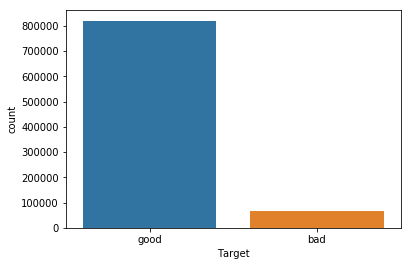

In [6]:
ax = sns.countplot(x='Target', data= df)

In [7]:
target_var = df['Target'].value_counts().values
percent_good = (target_var[0] / float(df['Target'].count()))*100
percent_bad = (target_var[1] / float(df['Target'].count()))*100
print("%s percent of loans in this dataset are good"%(percent_good))
print("%s percent of loans in this dataset are bad" %(percent_bad))

92.4013302095 percent of loans in this dataset are good
7.59866979047 percent of loans in this dataset are bad


This is a binary classification problem as the two classes are "bad" loans and "good" loans. Upon further analysis, it seems that there is a class imbalance problem in this dataset. There is a significant imbalance between the two classes, as 93% of loans are "good" while 7% are "bad". This ratio between the two classes, approximately 13.5:1, may result in problems later on in the modelling stage.

In [8]:
for row in df['dti']:
    if row > 100:
        print(row)
df['dti'].describe()

1092.52
137.4
136.97
9999.0
100.09
120.66
9999.0
380.53
672.52
125.25
104.0


count    887379.000000
mean         18.157039
std          17.190626
min           0.000000
25%          11.910000
50%          17.650000
75%          23.950000
max        9999.000000
Name: dti, dtype: float64

count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

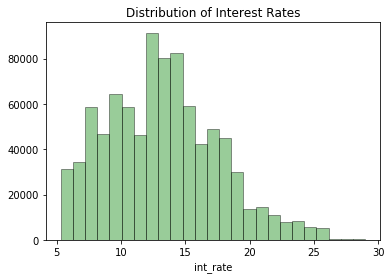

In [9]:
sns.distplot(df['int_rate'], hist=True, kde=False, 
             bins=25, color = 'green',
             hist_kws={'edgecolor':'black'}).set_title("Distribution of Interest Rates")

df['int_rate'].describe()

In [10]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

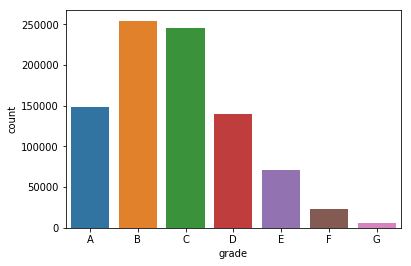

In [11]:
ax = sns.countplot(x='grade', order = ['A','B','C','D','E','F','G'], data= df)

In [12]:
df.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

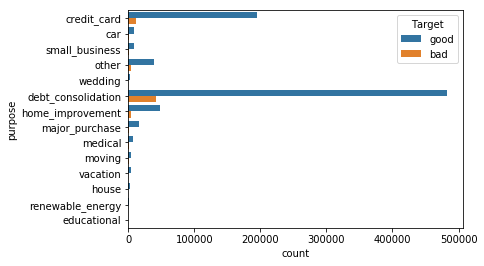

In [13]:
ax = sns.countplot(y='purpose',  hue = 'Target', data= df)
df.purpose.value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

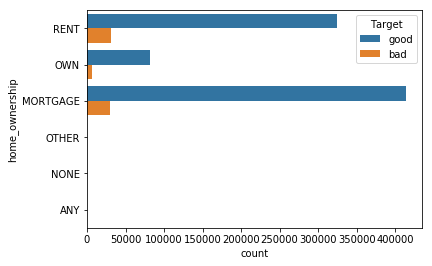

In [14]:
ax = sns.countplot(y='home_ownership',  hue = 'Target', data= df)
df.home_ownership.value_counts()

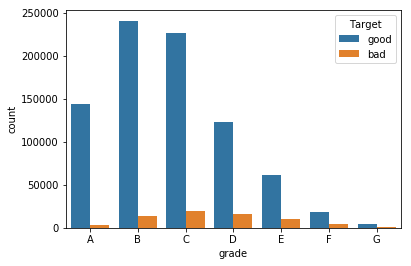

In [15]:
ax = sns.countplot(x='grade', order = ['A','B','C','D','E','F','G'],data= df, hue = 'Target')


## Data Cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 1077501 to 36271262
Data columns (total 74 columns):
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status                    887379 non-null object
pymnt_plan  

There are many columns in this dataframe that are mostly incomplete or null. I begin the data cleaning process by removing columns with mostly null values. More specifically, any column that is more than 75% null is removed.

In [20]:
total_length = 887379.0
for col in df:
    total_null = df[col].isnull().sum().sum()
    percent_null = float(total_null/total_length)*100
    if percent_null > 75:
        print("The attribute %s is %f percent null"%(col,percent_null))
        df.drop(col, axis = 1,inplace = True)

The attribute desc is 85.797726 percent null
The attribute mths_since_last_record is 84.555303 percent null
The attribute mths_since_last_major_derog is 75.015974 percent null
The attribute annual_inc_joint is 99.942415 percent null
The attribute dti_joint is 99.942640 percent null
The attribute verification_status_joint is 99.942415 percent null
The attribute open_acc_6m is 97.591559 percent null
The attribute open_il_6m is 97.591559 percent null
The attribute open_il_12m is 97.591559 percent null
The attribute open_il_24m is 97.591559 percent null
The attribute mths_since_rcnt_il is 97.654892 percent null
The attribute total_bal_il is 97.591559 percent null
The attribute il_util is 97.902024 percent null
The attribute open_rv_12m is 97.591559 percent null
The attribute open_rv_24m is 97.591559 percent null
The attribute max_bal_bc is 97.591559 percent null
The attribute all_util is 97.591559 percent null
The attribute inq_fi is 97.591559 percent null
The attribute total_cu_tl is 97.5

Next, we want to see how many unique values each column has. If a column is non-continuous and has a large amount of unique values, we will get rid of it. 

In [21]:
for col in df:
        print("%s %d " % (col,df[col].nunique()))

member_id 887379 
loan_amnt 1372 
funded_amnt 1372 
funded_amnt_inv 9856 
term 2 
int_rate 542 
installment 68711 
grade 7 
sub_grade 35 
emp_title 299271 
emp_length 11 
home_ownership 6 
annual_inc 49384 
verification_status 3 
issue_d 103 
loan_status 10 
pymnt_plan 2 
url 887379 
purpose 14 
title 63144 
zip_code 935 
addr_state 51 
dti 4086 
delinq_2yrs 29 
earliest_cr_line 697 
inq_last_6mths 28 
mths_since_last_delinq 155 
open_acc 77 
pub_rec 32 
revol_bal 73740 
revol_util 1356 
total_acc 135 
initial_list_status 2 
out_prncp 248332 
out_prncp_inv 266244 
total_pymnt 506726 
total_pymnt_inv 506616 
total_rec_prncp 260227 
total_rec_int 324635 
total_rec_late_fee 6181 
recoveries 23055 
collection_recovery_fee 20708 
last_pymnt_d 98 
last_pymnt_amnt 232451 
next_pymnt_d 100 
last_credit_pull_d 103 
collections_12_mths_ex_med 12 
policy_code 1 
application_type 2 
acc_now_delinq 8 
tot_coll_amt 10325 
tot_cur_bal 327342 
total_rev_hi_lim 21251 
Target 2 


In [22]:
df.drop(columns = ['emp_title','url', 'member_id' ,'title','zip_code','policy_code',
                  'verification_status', 'home_ownership', 'issue_d','earliest_cr_line','last_pymnt_d',
                'next_pymnt_d', 'last_credit_pull_d'],  inplace = True)

While I previously removed columns that were more than 75% null, there are still many features in the dataframe that have null values. To clean these null values, I will fill them with the median value of the respective column. 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 1077501 to 36271262
Data columns (total 41 columns):
loan_amnt                     887379 non-null float64
funded_amnt                   887379 non-null float64
funded_amnt_inv               887379 non-null float64
term                          887379 non-null object
int_rate                      887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null object
sub_grade                     887379 non-null object
emp_length                    842554 non-null object
annual_inc                    887375 non-null float64
loan_status                   887379 non-null object
pymnt_plan                    887379 non-null object
purpose                       887379 non-null object
addr_state                    887379 non-null object
dti                           887379 non-null float64
delinq_2yrs                   887350 non-null float64
inq_last_6mths           

In [24]:
df['emp_length'].fillna(value='0 years',inplace=True)
df['annual_inc'].fillna(df['annual_inc'].median(),inplace=True)
df['delinq_2yrs'].fillna(df['delinq_2yrs'].median(),inplace=True)
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(),inplace=True)
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median(),inplace=True)
df['open_acc'].fillna(df['open_acc'].median(),inplace=True)
df['pub_rec'].fillna(df['pub_rec'].median(),inplace=True)
df['revol_util'].fillna(df['revol_util'].median(),inplace=True)
df['total_acc'].fillna(df['total_acc'].median(),inplace=True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median(),inplace=True)
df['acc_now_delinq'].fillna(df['acc_now_delinq'].median(),inplace=True)
df['tot_coll_amt'].fillna(df['tot_coll_amt'].median(),inplace=True)
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(),inplace=True)
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median(),inplace=True)

In [25]:
df['emp_length'].fillna(value='0 years',inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

In [26]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Target
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10,24000.0,...,0.00,0.00,171.62,0.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,good
1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,1,30000.0,...,117.08,1.11,119.66,0.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,bad
1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10,12252.0,...,0.00,0.00,649.91,0.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,good
1076863,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10,49200.0,...,0.00,0.00,357.48,0.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,good
1075358,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1,80000.0,...,0.00,0.00,67.79,0.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,good


## Preparation for Modelling

In [27]:
def target(row):
    if row['Target'] == 'bad':
        return 1
    else:
        return 0

df['Target'] = df.apply(lambda row: target(row),axis=1)

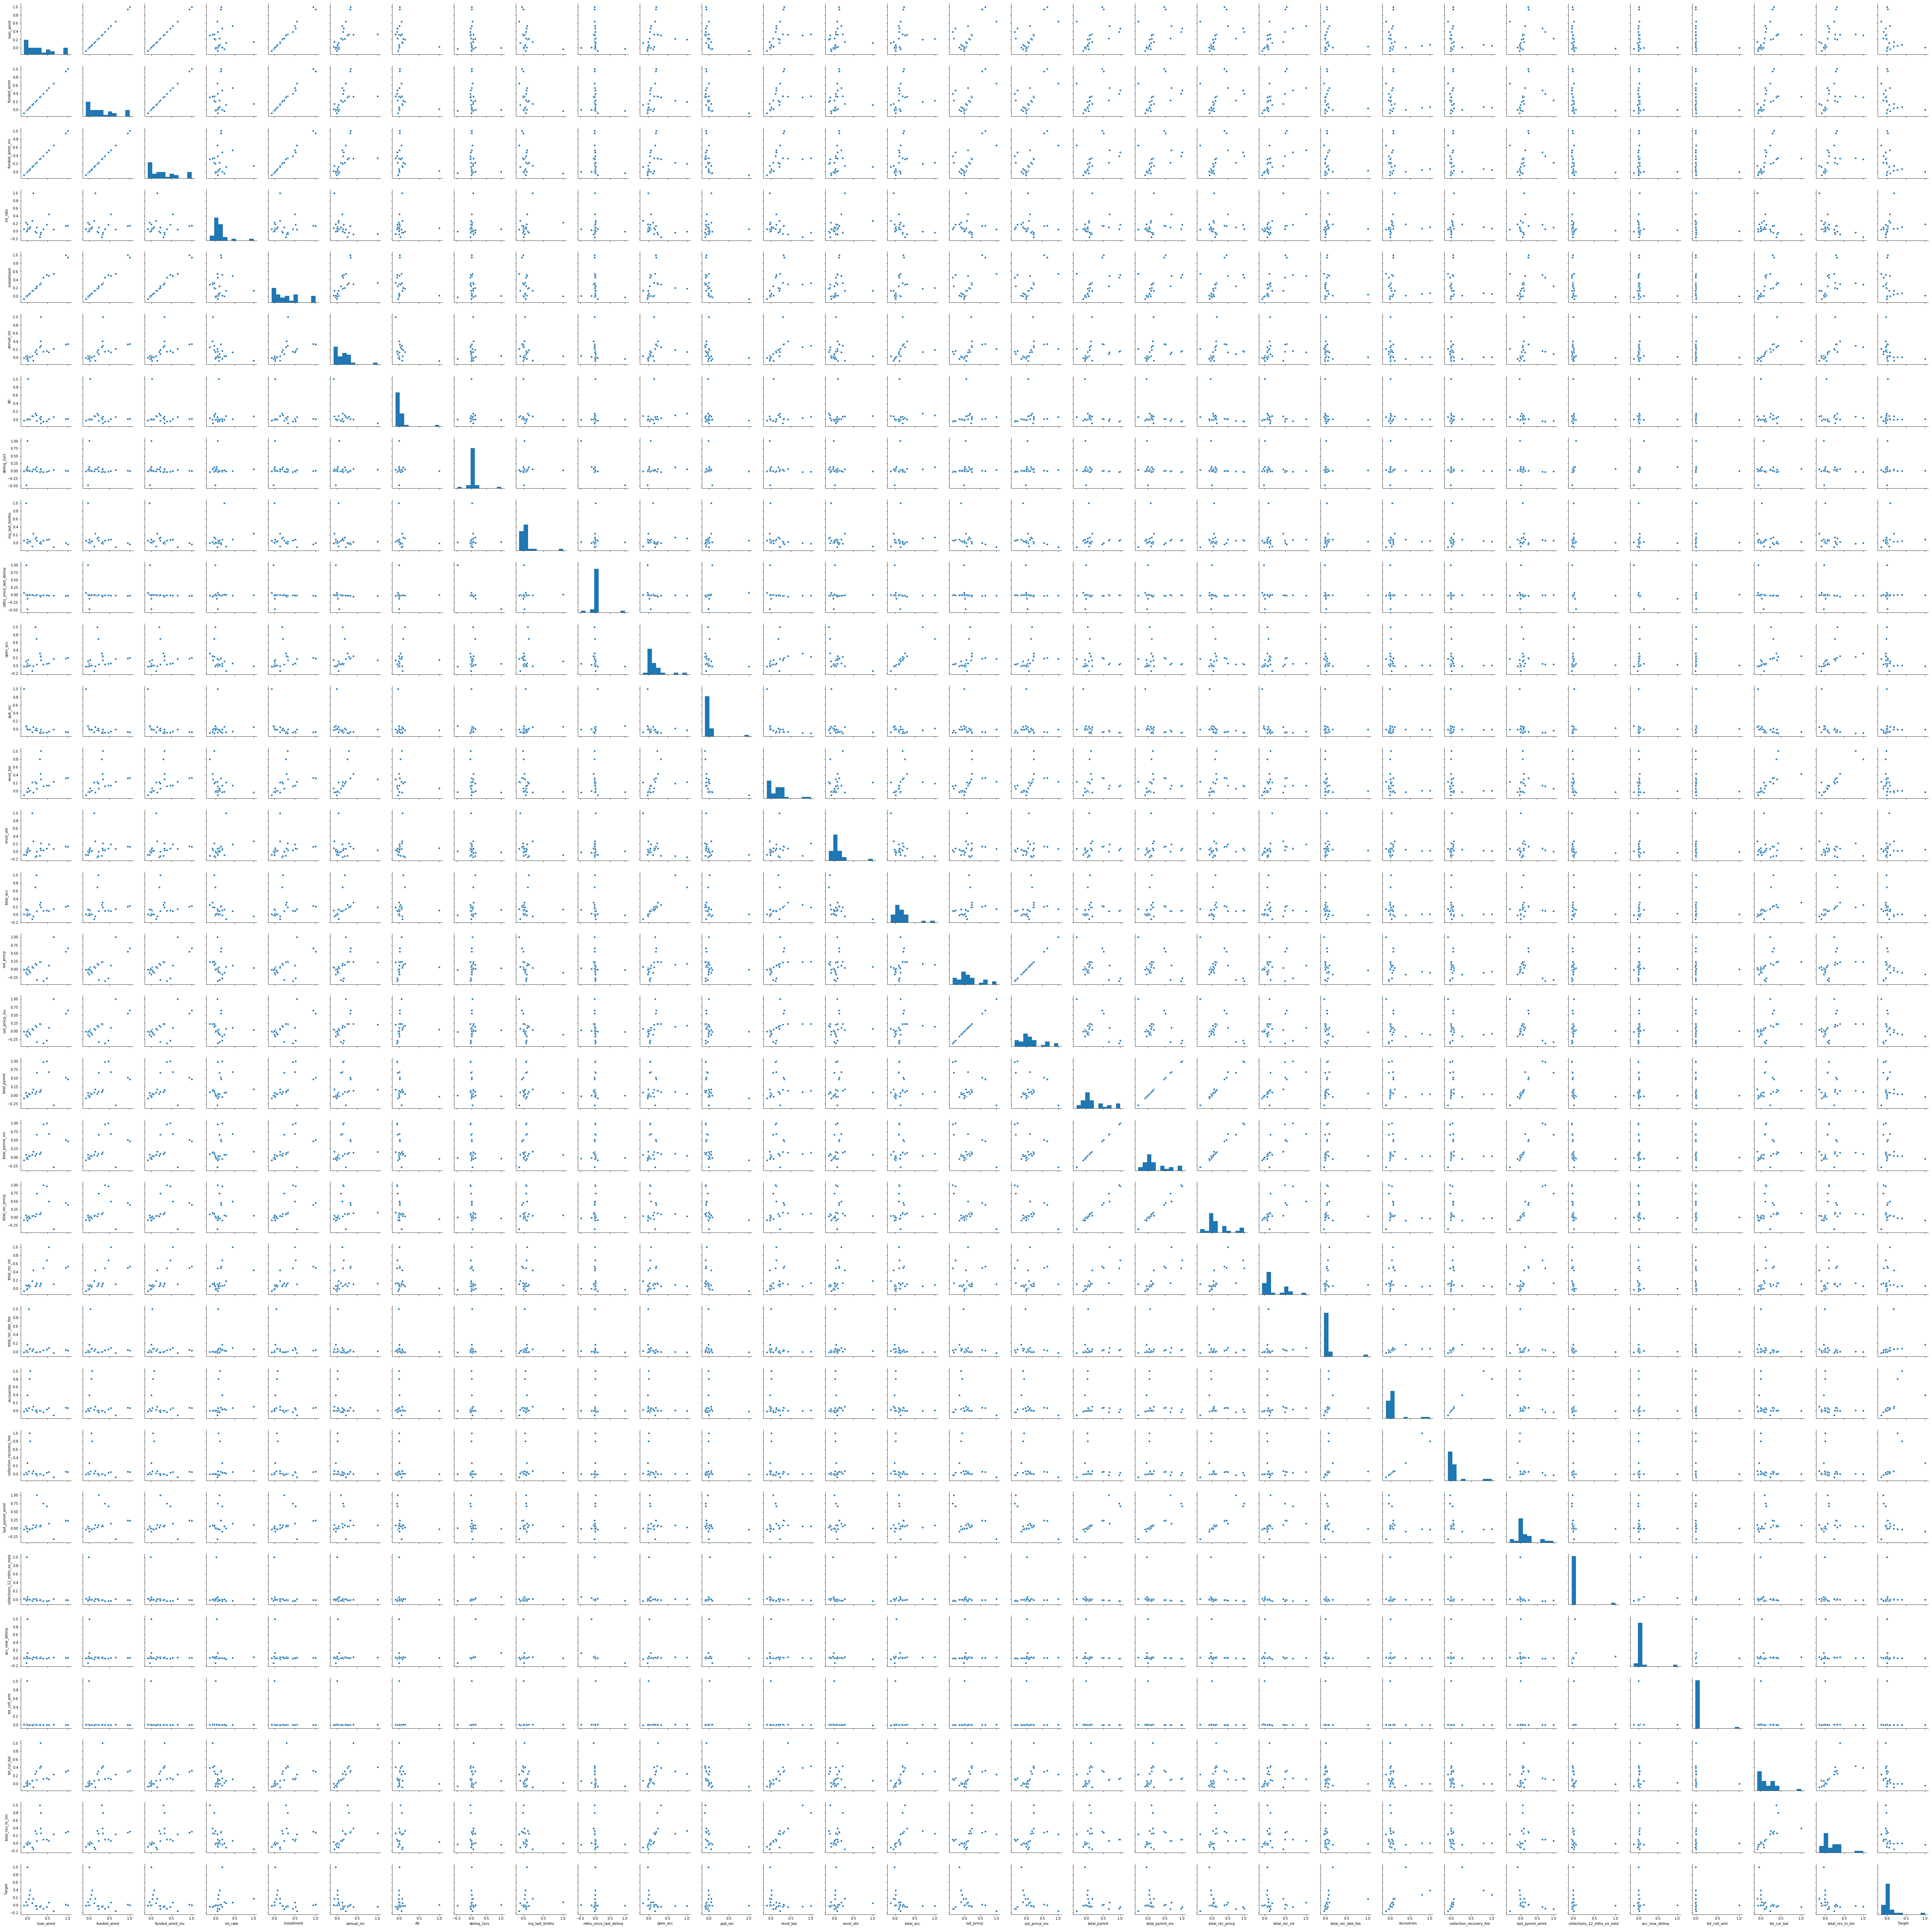

In [28]:
sns.pairplot(df.corr())

In [29]:
corr = df.corr()['Target'].sort_values()

# Display correlations
print('Most Positive Correlations:', corr.tail(10))
print('Most negative Correlations:', corr.head(10))

('Most Positive Correlations:', dti                        0.009961
installment                0.014124
revol_util                 0.050115
total_rec_int              0.067069
inq_last_6mths             0.080887
total_rec_late_fee         0.166320
int_rate                   0.175450
collection_recovery_fee    0.269621
recoveries                 0.390846
Target                     1.000000
Name: Target, dtype: float64)
('Most negative Correlations:', out_prncp          -0.158544
out_prncp_inv      -0.158540
last_pymnt_amnt    -0.101260
total_rec_prncp    -0.095991
tot_cur_bal        -0.044255
total_pymnt_inv    -0.043552
total_pymnt        -0.042515
total_rev_hi_lim   -0.041976
annual_inc         -0.034142
revol_bal          -0.020689
Name: Target, dtype: float64)


In [30]:
train_df = df.copy()
train_df.drop(columns = ['loan_status'], inplace = True)

In [31]:
train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                    2
grade                   7
sub_grade              35
emp_length             11
pymnt_plan              2
purpose                14
addr_state             51
initial_list_status     2
application_type        2
dtype: int64

In order to build our model, we must label encode our categorical features with <=2 possible values and hot encode features with >2 possible values

In [32]:
from sklearn import preprocessing

count = 0

for col in train_df:
    if train_df[col].dtype == 'object':
        if len(list(train_df[col].unique())) <= 2:     
            label_encode = preprocessing.LabelEncoder()
            train_df[col] = label_encode.fit_transform(train_df[col])
            count += 1

In [33]:
train_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Target
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,5000.0,4975.0,0,10.65,162.87,B,B2,10,24000.0,...,0.00,0.00,171.62,0.0,0,0.0,0.0,80559.0,23700.0,0
1077430,2500.0,2500.0,2500.0,1,15.27,59.83,C,C4,1,30000.0,...,117.08,1.11,119.66,0.0,0,0.0,0.0,80559.0,23700.0,1
1077175,2400.0,2400.0,2400.0,0,15.96,84.33,C,C5,10,12252.0,...,0.00,0.00,649.91,0.0,0,0.0,0.0,80559.0,23700.0,0
1076863,10000.0,10000.0,10000.0,0,13.49,339.31,C,C1,10,49200.0,...,0.00,0.00,357.48,0.0,0,0.0,0.0,80559.0,23700.0,0
1075358,3000.0,3000.0,3000.0,1,12.69,67.79,B,B5,1,80000.0,...,0.00,0.00,67.79,0.0,0,0.0,0.0,80559.0,23700.0,0


In [34]:
train_df.drop(columns = ['addr_state','grade', 'sub_grade','emp_length','purpose'], inplace = True)

In [35]:
print(train_df.shape)

(887379, 35)


## Modeling

First, we create a baseline logistic regression model 

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df.drop('Target',axis=1), 
                                                    train_df['Target'], test_size=0.2)

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

def performance_report(model, predictions, X_test, Y_test):
    print('Cohen Kappa Score:', cohen_kappa_score(Y_test,predictions))
    print(' ')
    print('Classification Report')
    print(' ')
    print(classification_report(Y_test,predictions))
    y_true = pd.Series(Y_test, name='Actual')
    y_pred = pd.Series(model.predict(X_test), name='Predicted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print('')
    print('Predicted   0       1')
    print('Actual')
    print('0' + '         '+ str(conf_matrix[0][0]) + '    ' +str(conf_matrix[0][1]))
    print('1' + '         '+ str(conf_matrix[1][0]) + '    ' +str(conf_matrix[1][1]))
    print(' ')
    print('Confusion matrix (0 = "good" loan 1 = "bad" loan)')
    _ = plt.matshow(confusion_matrix(model.predict(X_test) , Y_test ), cmap=plt.cm.binary, interpolation='nearest')
    _ = plt.colorbar()
    _ = plt.ylabel('true label')
    _ = plt.xlabel('predicted label')

In [39]:
def ROC_curve(model, X_train, Y_train, X_test, Y_test):
    tmp = model.fit(X_train, Y_train)
    y_pred_sample_score = tmp.decision_function(X_test)


    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_sample_score)

    roc_auc = auc(fpr,tpr)


    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

('Cohen Kappa Score:', 0.78308662265073981)
 
Classification Report
 
             precision    recall  f1-score   support

          0       0.97      1.00      0.99    163893
          1       0.99      0.66      0.80     13583

avg / total       0.97      0.97      0.97    177476

Confusion Matrix

Predicted   0       1
Actual
0         163829    64
1         4553    9030
 
Confusion matrix (0 = "good" loan 1 = "bad" loan)


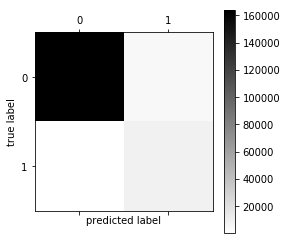

In [40]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
predictions = logmodel.predict(X_test)
performance_report(logmodel, predictions, X_test, Y_test)

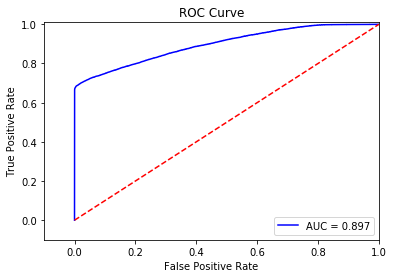

In [41]:
ROC_curve(logmodel, X_train, Y_train, X_test, Y_test)

According to the confusion matrix, the amount of false negatives, or the number of loans our model predicted as 'good' but actually are 'bad' is rather high (around 4412). The amount of false postives, or the number of loans our model predicted as 'bad' but turned out to be good' is very low at 122. Thus the recall score is around 0.67, which is problematic. While lending loan is hurt by false negatives, false positives do not have much of an impact, except that you would essentially turn down "good" loans. This low recall score caused by the high rate of false negatives might be a result of the class imbalance. Because there are so few "bad" loans in the dataset, approximately 7%, the model may be achieving high accuracy by predicting more loans as "good" purely as a result of this imbalance. While the model did achieve high accuracy, the accuracy may be simply reflecting the underlying class distribution.

In order to attempt to fix the class imbalance, I will perform oversampling on the training set using SMOTE

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [43]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train_r, Y_train_r = sm.fit_sample(X_train_std, Y_train)

('Cohen Kappa Score:', 0.66252947110610982)
 
Classification Report
 
             precision    recall  f1-score   support

          0       0.98      0.97      0.97    163893
          1       0.64      0.74      0.69     13583

avg / total       0.95      0.95      0.95    177476

Confusion Matrix

Predicted   0       1
Actual
0         158333    5560
1         3496    10087
 
Confusion matrix (0 = "good" loan 1 = "bad" loan)


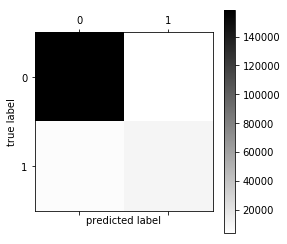

In [44]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_train_r, Y_train_r)
predictions = logmodel2.predict(X_test_std)
performance_report(logmodel2, predictions, X_test_std, Y_test)

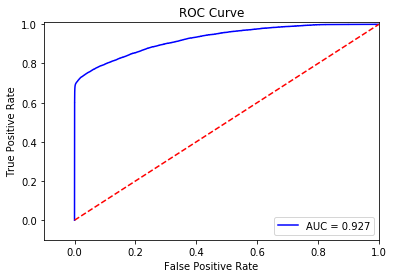

In [45]:
ROC_curve(logmodel2, X_train_r, Y_train_r, X_test_std, Y_test)

In [46]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X = X_train
Y = Y_train
X_resampled, Y_resampled, idx_resampled = rus.fit_sample(X, Y)

X_resampled = pd.DataFrame(X_resampled)
Y_resampled = pd.DataFrame(Y_resampled)
Y_resampled.columns = ['Class']
undersampled_data = pd.concat([X_resampled, Y_resampled], axis=1)

X = undersampled_data.values
Y = undersampled_data.Class.values
X_train_rus, X_test_rus, Y_train_rus, Y_test_rus = train_test_split(X, Y ,test_size=0.2)

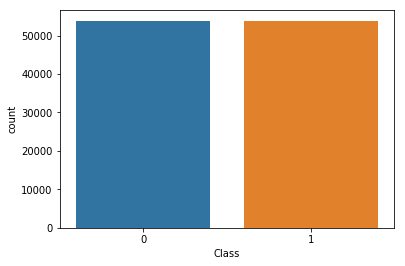

In [47]:
ax = sns.countplot(x='Class', data= Y_resampled)

('Cohen Kappa Score:', 0.70025240190364024)
 
Classification Report
 
             precision    recall  f1-score   support

          0       0.78      0.97      0.86     10629
          1       0.97      0.73      0.83     10910

avg / total       0.87      0.85      0.85     21539

Confusion Matrix

Predicted   0       1
Actual
0         10342    287
1         2951    7959
 
Confusion matrix (0 = "good" loan 1 = "bad" loan)


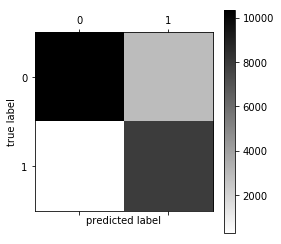

In [48]:
logmodel3 = LogisticRegression()
logmodel3.fit(X_train_rus, Y_train_rus)
predictions = logmodel3.predict(X_test_rus)
performance_report(logmodel3, predictions, X_test_rus, Y_test_rus)

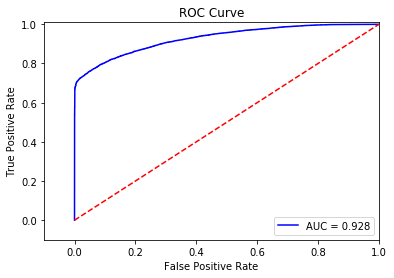

In [49]:
ROC_curve(logmodel3, X_train_rus, Y_train_rus, X_test_rus, Y_test_rus)

In [50]:
from scipy.stats import chi2
from scipy import stats
def mcnemar(x, y):
    n1 = np.sum(x < y)
    n2 = np.sum(x > y)
    stat = (np.abs(n1-n2)-1)**2 / (n1+n2)
    df = 1
    pval = chi2.sf(stat,1)
    return stat, pval


In [51]:
import numpy as np

a_yn = np.array([int(p==t)for p,t in zip(logmodel.predict(X_test), Y_test)])
b_yn = np.array([int(p==t)for p,t in zip(logmodel2.predict(X_test_std), Y_test)])
stats.ttest_rel(a_yn,b_yn)
print(mcnemar(a_yn,b_yn)[1]<0.05)

True
